In [71]:
import pandas as pd
import numpy as np
data = pd.read_csv('/Bridging the Communication Gap - A Data Driven Study and Analysis (Responses).csv')
data.head()

,Timestamp,NAME :,rate,misunderstand,understanding,skill,chance
0,10/16/2024 23:08:41,Bipin Sai Surya Guttula,4,Rarely,Frequently,Moderate,"Yes, I would"
1,10/17/2024 7:22:18,Ankitha,4,Sometimes,Frequently,Moderate,"Yes, I would"
2,10/17/2024 8:01:36,Akash verma,5,Rarely,Frequently,Significant,"Yes, I would"
3,10/17/2024 8:05:42,M VASHISHTA VARMA,3,Rarely,Seldom,Significant,"Yes, I would"
4,10/17/2024 8:08:13,Rithun C,3,Sometimes,Frequently,Significant,"No, I would not"


In [72]:

data = data.iloc[:, 2:]
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 408 entries, 0 to 407
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   rate           408 non-null    int64 
 1   misunderstand  408 non-null    object
 2   understanding  408 non-null    object
 3   skill          408 non-null    object
 4   chance         408 non-null    object
dtypes: int64(1), object(4)
memory usage: 16.1+ KB


In [73]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['misunderstand'] = le.fit_transform(data['misunderstand'])
data['understanding'] = le.fit_transform(data['understanding'])
data['skill'] = le.fit_transform(data['skill'])
data['chance'] = le.fit_transform(data['chance'])
data.head()


,rate,misunderstand,understanding,skill,chance
0,4,3,1,2,1
1,4,4,1,2,1
2,5,3,1,3,1
3,3,3,4,3,1
4,3,4,1,3,0


In [74]:
print(data.corr())

                   rate  misunderstand  understanding     skill    chance
rate           1.000000       0.023482      -0.195767  0.080887 -0.023710
misunderstand  0.023482       1.000000       0.028264  0.002944  0.045470
understanding -0.195767       0.028264       1.000000 -0.121340  0.037340
skill          0.080887       0.002944      -0.121340  1.000000 -0.008391
chance        -0.023710       0.045470       0.037340 -0.008391  1.000000


In [75]:
data.keys()

Index(['rate', 'misunderstand', 'understanding', 'skill', 'chance'], dtype='object')

In [76]:
X = data[["rate", "misunderstand", "understanding", "skill"]].copy()

y = data["chance"].copy()

from sklearn.model_selection import StratifiedShuffleSplit

stratSplit = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=0)
for train_index, test_index in stratSplit.split(X, y):
    # Use .iloc to access rows by index:
    X_train = X.iloc[train_index]
    X_test = X.iloc[test_index]

    y_train = y.iloc[train_index]
    y_test = y.iloc[test_index]

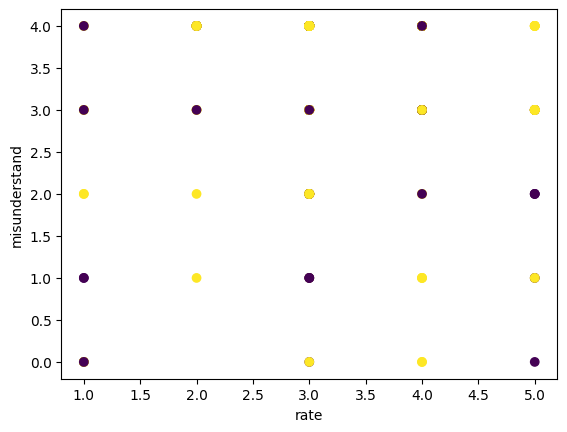

In [77]:
import matplotlib.pyplot as plt


plt.scatter(X_train["rate"], X_train["misunderstand"], c=y_train)

plt.xlabel(data.columns[0])
plt.ylabel(data.columns[1])

plt.show()


In [78]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators = 100,
                                bootstrap = True,
                                max_samples = None, # int, float
                                oob_score = True,
                                criterion = "gini",
                                #splitter = "best", not available here, performs best
                                max_depth = 1,#decision stumps
                                min_samples_split = 2,
                                min_samples_leaf = 1,
                                min_weight_fraction_leaf = 0,
                                max_features = None,
                                max_leaf_nodes = None,
                                random_state = None,
                                min_impurity_decrease = 0.0,
                                class_weight = None,
                                ccp_alpha = 0.0,
                                n_jobs = -1
                               )
rf_clf.fit(X_train, y_train)
print("Test score:",rf_clf.score(X_test,y_test))
print("OOB score:",rf_clf.oob_score_)

Test score: 0.6951219512195121
OOB score: 0.6993865030674846
